# Isolation Forest – Unsupervised Fraud Detection
## Credit Card Fraud Detection

**Objective:**
To detect fraudulent transactions using an unsupervised anomaly detection
approach without relying on class labels during training.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score
)

In [2]:
df = pd.read_csv("data/creditcard.csv")

X = df.drop(columns=["Class"])
y = df["Class"]

Isolation Forest is trained without using labels and later evaluated
against known fraud labels.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [4]:
X_train_normal = X_train[y_train == 0]

iso = IsolationForest(
    n_estimators=300,
    contamination=y.mean(),  # approximate fraud ratio
    random_state=42,
    n_jobs=-1
)

iso.fit(X_train_normal)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",300
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",np.float64(0....7485630620034)
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",-1
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


The model is trained only on normal transactions to learn the pattern
of legitimate behavior.

In [5]:
y_pred_raw = iso.predict(X_test)
y_pred = np.where(y_pred_raw == -1, 1, 0)

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.21      0.28      0.24        98

    accuracy                           1.00     56962
   macro avg       0.61      0.64      0.62     56962
weighted avg       1.00      1.00      1.00     56962



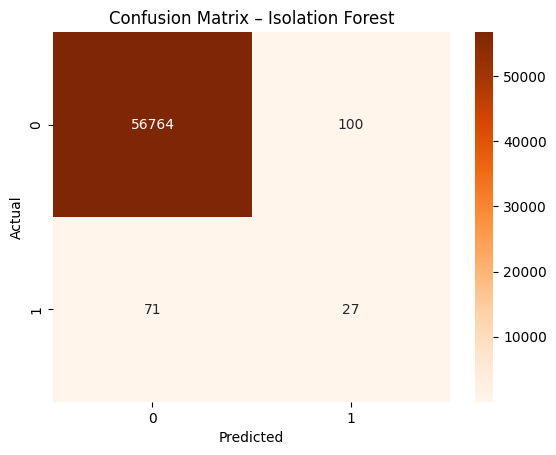

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix – Isolation Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
precision_score(y_test, y_pred)

0.2125984251968504

In [11]:
recall_score(y_test, y_pred)

0.2755102040816326

In [9]:
scores = -iso.decision_function(X_test)

roc_auc_score(y_test, scores)

0.9528436268992684

Anomaly scores provide a continuous measure useful for ranking
transactions by fraud risk.